- Quais Upps destoam das demais no que diz respeito a
ocorrências relacionadas à apreensão de drogas?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
upps = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/UppEvolucaoMensalDeTitulos.csv', sep= ';', encoding= 'latin1')
upps

,cod_upp,upp,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,...,armas_apreendidas,cump_mandado_prisao,ocorr_flagrante,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
0,1,Santa Marta,2007,1,0,0,0,0,0,1,...,2,1,0,0,0,0,0,0,0,11
1,2,Cidade de Deus,2007,1,3,0,0,0,1,18,...,7,2,11,7,2,0,0,0,0,98
2,3,Batam,2007,1,0,0,0,0,0,4,...,0,0,0,1,0,0,0,0,0,19
3,4,Chapéu Mangueira / Babilônia,2007,1,0,0,0,0,0,1,...,0,2,0,1,0,0,0,0,0,9
4,5,Pavão-Pavãozinho,2007,1,0,0,0,0,0,4,...,0,0,0,1,1,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,34,Arará / Mandela,2024,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7976,35,Lins,2024,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7977,36,Camarista Méier,2024,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7978,37,Mangueirinha,2024,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
apreensao_drogas = upps.groupby('cod_upp')['apreensao_drogas'].sum().reset_index()   
apreensao_drogas

,cod_upp,apreensao_drogas
0,1,228
1,2,2818
2,3,310
3,4,361
4,5,655
5,6,538
6,7,716
7,8,555
8,9,205
9,10,389


In [6]:
apreensao_drogas_array = np.array(apreensao_drogas["apreensao_drogas"])

In [42]:
mediana = np.median(apreensao_drogas_array)
media = np.mean(apreensao_drogas_array)
q1 = np.percentile(apreensao_drogas_array, 25)
q2 = np.percentile(apreensao_drogas_array, 50)
q3 = np.percentile (apreensao_drogas_array, 75)
distancia = (media - mediana)/mediana
iqr = q3 - q1
limite_superior = q3 + (1.5 * iqr)
limite_inferior = q1 - (1.5 * iqr)
print(f'Média: {media}')
print(f'Primeiro Quartil (Q1): {q1}')
print(f'Segundo Quartil (Q2, Mediana): {q2}')
print(f'Mediana: {mediana}')
print(f'Terceiro Quartil (Q3): {q3}')
print(f'Distância: {round(distancia*100,2)} %')
print(f'Limite inferior: {limite_inferior}')
print(f'Limite superior: {limite_superior}')

Média: 508.05263157894734
Primeiro Quartil (Q1): 263.0
Segundo Quartil (Q2, Mediana): 402.0
Mediana: 402.0
Terceiro Quartil (Q3): 596.0
Distância: 26.38 %
Limite inferior: -236.5
Limite superior: 1095.5


In [44]:
ap_drogas_outliers = apreensao_drogas.loc[apreensao_drogas['apreensao_drogas'] >= limite_superior]
ap_drogas_outliers.sort_values(by="apreensao_drogas", ascending= False)

,cod_upp,apreensao_drogas
1,2,2818
37,38,1363
28,29,1132


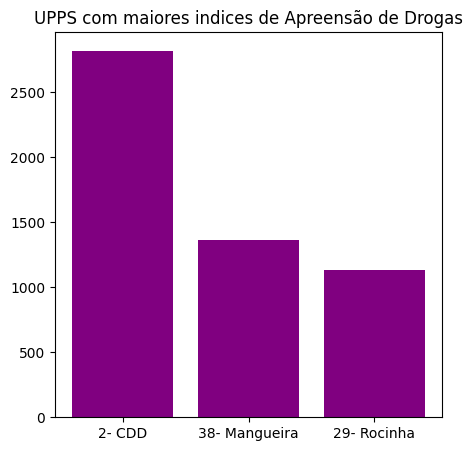

In [45]:
df = {'UPP': ['2- CDD', '38- Mangueira', '29- Rocinha'],
'Apreensao_Drogas': [2818, 1363, 1132]}

upp = df['UPP']
ap_drogas = df['Apreensao_Drogas']

plt.figure(figsize=(5,5))
plt.bar(upp, ap_drogas, color= 'purple')
plt.title('UPPS com maiores indices de Apreensão de Drogas')

plt.show()

Neste caso, as UPPs da Cidade de Deus, Mangueira e Rocinha são as outliers, onde possuem as maiores ocorrências de apreensão de drogas

- Compare os outliers dos dois primeiros anos da atual gestão com os dois primeiros anos da gestão anterior no que diz
respeito a estelionato na região metropolitana. O padrão se manteve?
Alguma delegacia deixou de ser outlier? Alguma delegacia passou a ser considerada outlier que anteriormente não era ?
Dois primeiros anos atual gestão: 2023/2024
Dois primeiros anos gestão anterior: 2019/2020


In [8]:
estelionato = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep= ';', encoding= 'latin1')
estelionato

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36624,159,8,2025,2025m08,35,4,Cachoeiras de Macacu,3300803,Interior,1,...,5.0,0.0,16,0,0,0,0,0,148,2
36625,165,8,2025,2025m08,33,5,Mangaratiba,3302601,Interior,0,...,5.0,0.0,21,2,0,0,0,0,179,2
36626,166,8,2025,2025m08,33,5,Angra dos Reis,3300100,Interior,3,...,11.0,3.0,63,8,0,0,0,0,595,2
36627,167,8,2025,2025m08,43,5,Paraty,3303807,Interior,0,...,3.0,0.0,13,2,0,1,0,0,234,2


In [9]:
regiao_metropolitana = ['Rio de Janeiro', 'São João de Meriti', 'Duque de Caxias', 'Belford Roxo', 'Nilópolis', 'Mesquita', 'Nova Iguaçu',
'Queimados', 'Japeri', 'Paracambi', 'Seropédica', 'Itaguaí', 'Mangaratiba', 'Magé', 'Guapimirim', 'Niterói' 'São Gonçalo', 'Itaboraí', 'Maricá', 'Tanguá', 'Rio Bonito', 'Cachoeiras de Macacu']
estelionato_atual_gestao = estelionato.loc[(estelionato['munic'].isin(regiao_metropolitana)) & (estelionato['ano'].isin([2023 , 2024]))] 
estelionato_atual_gestao

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
32245,1,1,2023,2023m01,5,1,Rio de Janeiro,3304557,Capital,0,...,5.0,0.0,12,2,0,0,0,0,772,3
32246,4,1,2023,2023m01,5,1,Rio de Janeiro,3304557,Capital,0,...,9.0,1.0,14,4,0,0,0,0,614,3
32247,5,1,2023,2023m01,5,1,Rio de Janeiro,3304557,Capital,1,...,14.0,1.0,30,4,0,0,0,0,1258,3
32248,6,1,2023,2023m01,4,1,Rio de Janeiro,3304557,Capital,2,...,2.0,2.0,19,3,0,0,0,0,360,3
32249,7,1,2023,2023m01,5,1,Rio de Janeiro,3304557,Capital,1,...,0.0,1.0,18,1,0,0,0,0,232,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35457,71,12,2024,2024m12,35,4,Itaboraí,3301900,Interior,4,...,7.0,0.0,59,7,0,0,0,0,573,3
35467,82,12,2024,2024m12,12,4,Maricá,3302700,Grande NiterÃ³i,2,...,11.0,0.0,115,5,0,0,0,0,1076,3
35492,119,12,2024,2024m12,35,4,Rio Bonito,3304300,Interior,1,...,0.0,0.0,20,0,0,0,0,0,178,3
35528,159,12,2024,2024m12,35,4,Cachoeiras de Macacu,3300803,Interior,1,...,1.0,0.0,27,2,0,0,0,0,137,3


In [10]:
regiao_metropolitana = ['Rio de Janeiro', 'São João de Meriti', 'Duque de Caxias', 'Belford Roxo', 'Nilópolis', 'Mesquita', 'Nova Iguaçu',
'Queimados', 'Japeri', 'Paracambi', 'Seropédica', 'Itaguaí', 'Mangaratiba', 'Magé', 'Guapimirim', 'Niterói' , 'São Gonçalo', 'Itaboraí', 'Maricá', 'Tanguá', 'Rio Bonito', 'Cachoeiras de Macacu']
estelionato_antiga_gestao = estelionato.loc[(estelionato['munic'].isin(regiao_metropolitana)) & (estelionato['ano'].isin([2019 , 2020]))] 
estelionato_antiga_gestao

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
25669,1,1,2019,2019m01,5,1,Rio de Janeiro,3304557,Capital,0,...,8.0,1.0,11,1,0,0,0,0,572,3
25670,4,1,2019,2019m01,5,1,Rio de Janeiro,3304557,Capital,1,...,15.0,10.0,12,2,1,0,0,0,625,3
25671,5,1,2019,2019m01,5,1,Rio de Janeiro,3304557,Capital,0,...,30.0,18.0,29,3,0,0,0,0,1095,3
25672,6,1,2019,2019m01,4,1,Rio de Janeiro,3304557,Capital,3,...,9.0,2.0,33,3,0,0,0,0,575,3
25673,7,1,2019,2019m01,5,1,Rio de Janeiro,3304557,Capital,1,...,0.0,0.0,9,0,0,0,0,0,147,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28890,81,12,2020,2020m12,12,4,Niterói,3303302,Grande NiterÃ³i,2,...,6.0,0.0,26,1,0,0,0,0,236,3
28891,82,12,2020,2020m12,12,4,Maricá,3302700,Grande NiterÃ³i,10,...,7.0,0.0,49,8,0,0,0,0,537,3
28916,119,12,2020,2020m12,35,4,Rio Bonito,3304300,Interior,0,...,5.0,1.0,17,1,0,0,0,0,124,3
28952,159,12,2020,2020m12,35,4,Cachoeiras de Macacu,3300803,Interior,0,...,2.0,0.0,14,1,0,0,0,0,90,3


In [11]:
atual_gestao = estelionato_atual_gestao.groupby('cisp')['estelionato'].sum().reset_index()  
atual_gestao

,cisp,estelionato
0,1,2146
1,4,1010
2,5,3011
3,6,1527
4,7,753
...,...,...
61,71,2402
62,82,3498
63,119,501
64,159,458


In [12]:
antiga_gestao = estelionato_antiga_gestao.groupby('cisp')['estelionato'].sum().reset_index()  
antiga_gestao

,cisp,estelionato
0,1,2560
1,4,417
2,5,1788
3,6,706
4,7,114
...,...,...
70,81,413
71,82,684
72,119,124
73,159,151


In [13]:
atual_gestao_array = np.array(atual_gestao["estelionato"])

In [14]:
antiga_gestao_array = np.array(antiga_gestao["estelionato"])

In [17]:
mediana_atual = np.median(atual_gestao_array)
media_atual = np.mean(atual_gestao_array)
q1_atual = np.percentile(atual_gestao_array, 25)
q2_atual = np.percentile(atual_gestao_array, 50)
q3_atual = np.percentile (atual_gestao_array, 75)
distancia_atual = (media_atual - mediana_atual)/mediana_atual
iqr_atual = q3_atual - q1_atual
limite_superior_atual = q3_atual + (1.5 * iqr_atual)
limite_inferior_atual = q1_atual - (1.5 * iqr_atual)
print(f'Média Atual Gestão: {media_atual}')
print(f'Mediana Atual Gestão: {mediana_atual}')
print(f'Distância Atual Gestão: {round(distancia_atual*100,2)} %')
print(f'Limite Superior Atual: {limite_superior_atual}')

Média Atual Gestão: 2828.651515151515
Mediana Atual Gestão: 2340.0
Distância Atual Gestão: 20.88 %
Limite Superior Atual: 6295.0


In [15]:
mediana_antiga = np.median(antiga_gestao_array)
media_antiga = np.mean(antiga_gestao_array)
q1_antiga = np.percentile(antiga_gestao_array, 25)
q2_antiga = np.percentile(antiga_gestao_array, 50)
q3_antiga = np.percentile (antiga_gestao_array, 75)
distancia_antiga = (media_antiga - mediana_antiga)/mediana_antiga
iqr_antiga = q3_antiga - q1_antiga
limite_superior_antiga = q3_antiga + (1.5 * iqr_antiga)
limite_inferior_antiga = q1_antiga - (1.5 * iqr_antiga)
print(f'Média Antiga Gestão: {media_antiga}')
print(f'Mediana Antiga Gestão: {mediana_antiga}')
print(f'Distância Antiga Gestão: {round(distancia_antiga*100,2)} %')
print(f'Limite Superior Antiga: {limite_superior_antiga}')

Média Antiga Gestão: 985.6
Mediana Antiga Gestão: 706.0
Distância Antiga Gestão: 39.6 %
Limite Superior Antiga: 2985.5


In [18]:
delegacias_outliers1 = atual_gestao.loc[atual_gestao['estelionato'] >= limite_superior_atual]
delegacias_outliers1.sort_values(by="estelionato", ascending= False)

,cisp,estelionato
31,35,10026
12,16,9665
28,32,9529
38,42,6433


In [19]:
delegacias_outliers2 = antiga_gestao.loc[antiga_gestao['estelionato'] >= limite_superior_antiga]
delegacias_outliers2.sort_values(by="estelionato", ascending= False)

,cisp,estelionato
31,35,3592
12,16,3054


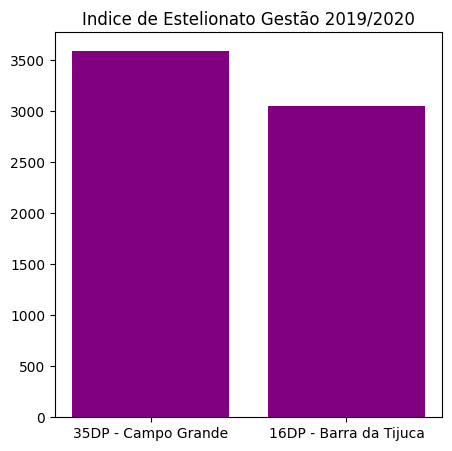

In [47]:
df = {'Delegacia': ['35DP - Campo Grande', '16DP - Barra da Tijuca'],
'Estelionato': [3592, 3054]}

cisp = df['Delegacia']
estelionato = df['Estelionato']

plt.figure(figsize=(5,5))
plt.bar(cisp, estelionato, color= 'purple')
plt.title('Indice de Estelionato Gestão 2019/2020')

plt.show()

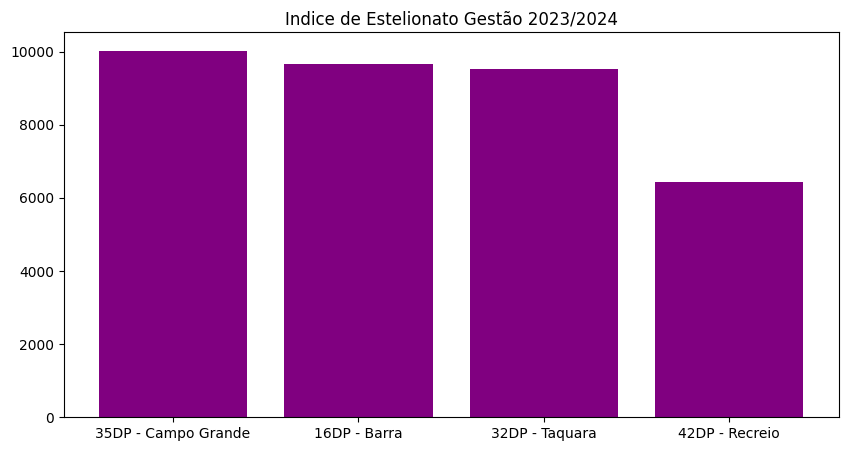

In [52]:
df = {'Delegacia': ['35DP - Campo Grande', '16DP - Barra', '32DP - Taquara', '42DP - Recreio'],
'Estelionato': [10026, 9665, 9529, 6433]}

cisp = df['Delegacia']
estelionato = df['Estelionato']

plt.figure(figsize=(10,5))
plt.bar(cisp, estelionato, color= 'purple')
plt.title('Indice de Estelionato Gestão 2023/2024')

plt.show()

Dois primeiros anos gestão anterior: 2019/2020 - 35 DP (Campo Grande), 16 DP (Barra da Tijuca)

Dois primeiros anos atual gestão: 2023/2024 - 35 DP (Campo Grande), 16 DP (Barra da Tijuca), 32 DP (Taquara), 42 DP (Recreio)

Alguma delegacia deixou de ser outlier? Não 

Alguma delegacia passou a ser considerada outlier que anteriormente não era ? Sim, as DPS da Taquara e Recreio passaram a ser outliers, 

devido ao alto índice de estelionato, ajudando a elevar o valor da média
